In [3]:
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt
from dataset.dataset import Dataset
import networkx as nx
from plot_params import *;
from tqdm import tqdm
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib
matplotlib.rcParams['font.family'] = 'Nimbus Roman'

100%|██████████| 10/10 [00:00<00:00, 4051.68it/s]


File: citeseer, Length: 117
File: computers, Length: 281
File: cora-full, Length: 485
File: cora, Length: 509
File: cs, Length: 217
File: ogbn-arxiv, Length: 179
File: photo, Length: 221
File: physics, Length: 311
File: pubmed, Length: 261
File: reddit, Length: 307


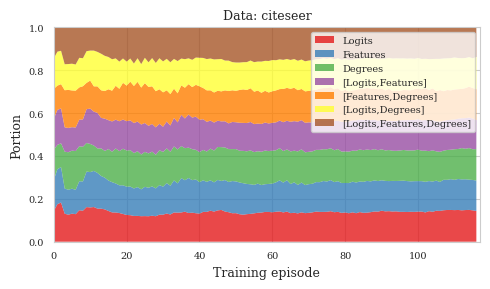

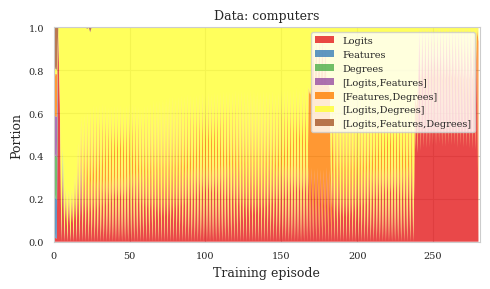

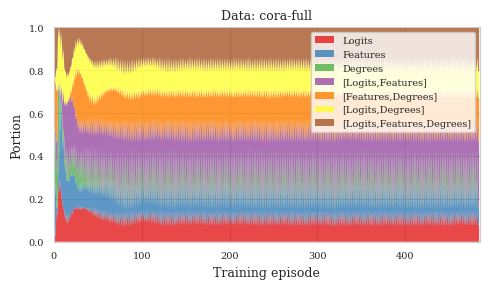

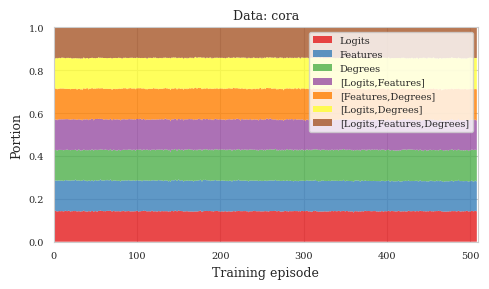

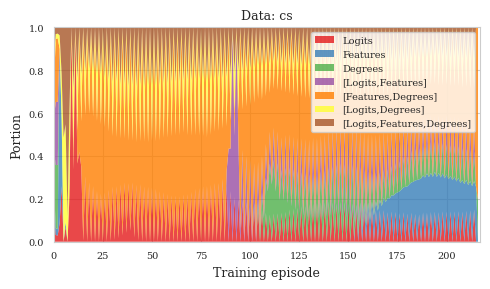

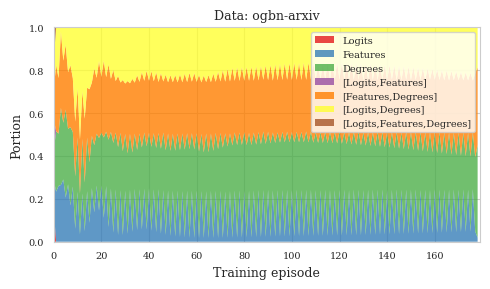

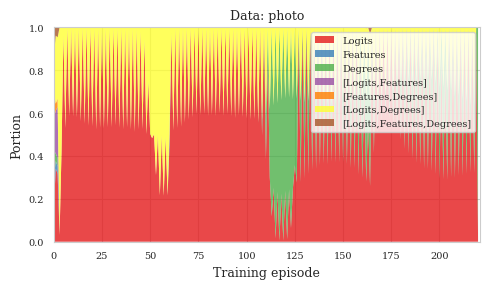

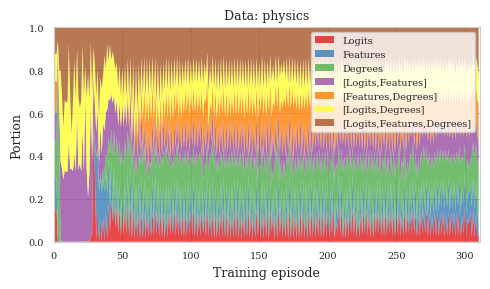

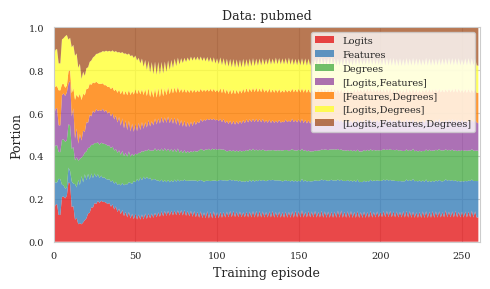

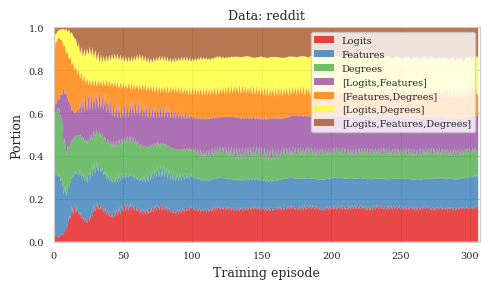

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 

files_names = ["citeseer", "computers", "cora-full", "cora", "cs",
               "ogbn-arxiv", "photo", "physics", "pubmed", "reddit"]
calibration_methods = ["MoE"]
gating_all = {}

for file in tqdm(files_names, total=len(files_names)):
    for method in calibration_methods:
        gating_all[file] = np.load(f"figs/{method}_{file}_node_gates_training.npy")
        print(f"File: {file}, Length: {len(gating_all[file])}")

for file in files_names:
    data = gating_all[file]
    
    data = data / data.sum(axis=1, keepdims=True)
    
    runs = np.arange(len(data))
    
    plt.figure(figsize=(5, 3))
    plt.rc('font', family='serif')
    
    node_gates_lbs = ['Logits','Features','Degrees','[Logits,Features]','[Features,Degrees]','[Logits,Degrees]','[Logits,Features,Degrees]']
    plt.stackplot(runs, data.T, labels=[node_gates_lbs[i] for i in range(data.shape[1])], alpha=0.8,edgecolor='none')
    plt.xlim(0, len(data))
    plt.ylim(0, 1)
    
    plt.title(f'Data: {file}', fontsize=9)
    plt.xlabel('Training episode', fontsize=9)
    plt.ylabel('Portion', fontsize=9)
    plt.legend(loc='upper right', fontsize=7) 
    
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)

    plt.tight_layout()
    
    plt.savefig(f"figs/Gating_stacked_area_{file}.pdf")
    plt.show()